In [1]:
import pandas as pd
import numpy as np
import lens

data = pd.read_csv("allegro-api-transactions.csv")
ls = lens.summarise(data)
explorer = lens.explore(ls)
explorer.describe()

/home/aur/anaconda3/lib/python3.7/site-packages/lens/metrics.py:588: RuntimeWarning:

invalid value encountered in true_divide

/home/aur/anaconda3/lib/python3.7/site-packages/lens/metrics.py:646: RuntimeWarning:

invalid value encountered in true_divide

/home/aur/anaconda3/lib/python3.7/site-packages/lens/metrics.py:588: RuntimeWarning:

invalid value encountered in true_divide

/home/aur/anaconda3/lib/python3.7/site-packages/lens/metrics.py:646: RuntimeWarning:

invalid value encountered in true_divide

/home/aur/anaconda3/lib/python3.7/site-packages/lens/metrics.py:588: RuntimeWarning:

invalid value encountered in true_divide



,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
desc,numeric,None,numeric,None,categorical,categorical,None,numeric,categorical,numeric,categorical,numeric,None,categorical
dtype,int64,object,int64,object,int64,int64,object,float64,int64,int64,int64,int64,object,object
notnulls,420020,420020,420020,420020,420020,420020,420020,420020,420020,420020,420020,420020,420020,420020
nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,420020,38953,332519,9020,2,2,51064,9722,2,7305,2,46093,10056,27


In [3]:
explorer.column_details('it_is_allegro_standard')

item,frequency
1,245063
0,174957


# Kodowanie zmiennych kategorycznych
Postanowiłam użyć tylko encoderów Bayesowskich, żeby móc porównać ich wyniki między sobą. Dzięki temu mogłam dla każdego z nich rozrysować gęstość i porównać pewne własności.

## Target Encoder

Zmienna _it_is_allegro_standard_ przyjmuje 0 i 1 (i to o dość zbliżonej częstotliwości), więc weźmy ją jako target. Zmienna, którą będziemy kodować to _categories_ (jest dość dużo unikalnych wartości, a kodowanie jej ma więcej sensu niż kodowanie np. nazwy sprzedawcy)

In [38]:
import category_encoders
te=category_encoders.target_encoder.TargetEncoder(data)

data_tmp = data.copy()
encoded=te.fit_transform(data['categories'],data['it_is_allegro_standard'])
data_tmp['target_encoded'] = encoded

In [39]:
data_tmp[['categories', 'it_is_allegro_standard', 'target_encoded']]

,categories,it_is_allegro_standard,target_encoded
0,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,0.909076
1,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.607713
2,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,0.844156
3,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",0,0.529915
4,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,0.703125
5,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.793939
6,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.793939
7,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,0.644068
8,"['RTV i AGD', 'AGD drobne', 'Higiena i pielęgn...",0,0.829787
9,"['RTV i AGD', 'Kamery', 'Zasilanie', 'Zasilacze']",1,0.522445


Sprawdźmy, jaki jest rozkład uzyskanej zmiennej w porównaniu do wyjściowego targetu

(array([174957., 245063.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

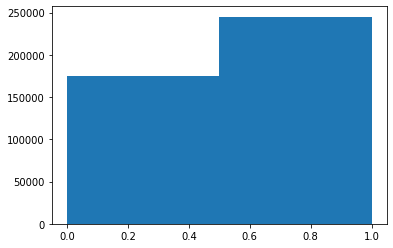

In [40]:
import matplotlib.pyplot as plt
plt.hist(data_tmp['it_is_allegro_standard'], bins=2)

(array([ 5824.,   404.,   438.,   226.,   117.,   429.,  1054.,   271.,
          228.,   206.,   450.,   329.,   201.,   348.,   704.,   884.,
          397.,   429.,   335.,   492.,  1498.,   952.,   953.,   891.,
         1135.,  1375.,  1625.,   827.,  1713.,   792.,  1350.,  1209.,
         2759.,  3685.,  1171.,  1730.,  4333.,  3754.,  4050.,  1955.,
         3809., 11987.,  3170.,  5512.,  3826.,  6807.,  9721.,  5302.,
         8552.,  5304.,  9108.,  8583.,  5860.,  8468., 14588., 10202.,
        10009.,  7360., 10902.,  5995., 12255.,  9932.,  9933., 12006.,
         9580.,  7582.,  9911., 10489., 10207., 11955.,  8738., 11749.,
         5865.,  5128.,  9260.,  5900.,  5988.,  7249.,  3767.,  6130.,
         5665.,  7075.,  3157.,  3074.,  3491.,  2286.,  1880.,  2282.,
         1607.,  2880.,  1400.,  1026.,   776.,   342.,   434.,   709.,
          204.,     0.,   346.,  1174.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

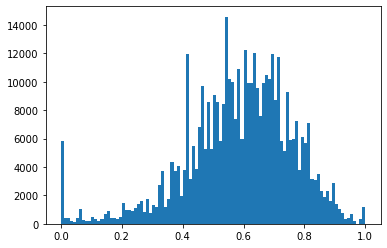

In [41]:
plt.hist(data_tmp['target_encoded'], bins=100)

Rozkład wyszedł dość przewidywalny, ale sprawdźmy, czym są tak wyróżniające się skrajne punkty.

In [42]:
data_tmp.loc[data_tmp['target_encoded'] <= 0.01]

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,target_encoded
940,940,2016-04-03 22:41:55,5915951474,"['Motoryzacja', 'Części samochodowe', 'Zabytko...",1,1,zabytkoweauta,10.00,0,1,0,56,Osmolice Pierwsze,Motoryzacja,5.315579e-04
1067,1067,2016-04-03 08:29:50,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00
1068,1068,2016-04-03 10:07:40,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00
1069,1069,2016-04-03 19:00:08,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00
1070,1070,2016-04-03 15:02:56,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00
1071,1071,2016-04-03 11:34:28,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00
1072,1072,2016-04-03 09:31:38,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00
1073,1073,2016-04-03 13:23:33,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00
1074,1074,2016-04-03 16:34:49,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00
1075,1075,2016-04-03 17:01:28,5962826674,"['Komputery', 'Internet', 'Pozostałe']",0,1,PSC-prepaid,104.79,0,97368,0,9722,Toruń,Komputery,0.000000e+00


In [43]:
data_tmp.loc[data_tmp['target_encoded'] >= 0.99]

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,target_encoded
230,230,2016-04-03 10:05:52,5173898274,"['Motoryzacja', 'Narzędzia i sprzęt warsztatow...",1,1,M-HURT_PROFI,5.95,1,676,0,29184,Kietrz,Motoryzacja,1.000000
231,231,2016-04-03 17:18:22,5173898274,"['Motoryzacja', 'Narzędzia i sprzęt warsztatow...",1,1,M-HURT_PROFI,5.95,1,676,0,29184,Kietrz,Motoryzacja,1.000000
249,249,2016-04-03 15:51:12,5198241874,"['Fotografia', 'Akcesoria fotograficzne', 'Alb...",1,1,MEMORYTIME_2012,49.90,1,64,0,12620,KAZIMIERZ BISKUPI,Fotografia,1.000000
959,959,2016-04-03 17:50:59,5920721874,"['Dla Dzieci', 'Zabawki', 'Klocki', 'Hemar']",1,1,polskie-zabawki,15.99,1,24,0,1585,SOSNOWIEC,Dla Dzieci,0.999993
966,966,2016-04-03 00:25:51,5924758874,"['Dla Dzieci', 'Odzież', 'Bielizna', 'Piżamy',...",1,1,enviecollection,23.00,1,13,0,4184,Konstantynów Łódzki,Dla Dzieci,0.999621
2742,2742,2016-04-03 13:02:23,5618346877,"['Delikatesy', 'Napoje i Akcesoria', 'Zaprawki']",1,1,deptana_pl,6.49,1,9163,0,15245,Łódź,Delikatesy,0.992508
4737,4737,2016-04-03 07:21:24,5392676076,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Obu...",1,1,NETKOM-ZYRARDOW,8.00,1,0,0,14882,Żyrardów,Telefony i Akcesoria,0.999981
5123,5123,2016-04-03 17:41:39,5799555076,"['Sport i Turystyka', 'Sporty towarzyskie i re...",1,1,wik2002,15.99,1,29,0,1458,Kostkowice,Sport i Turystyka,0.992508
5345,5345,2016-04-03 12:45:08,5923514276,"['Książki i Komiksy', 'Mapy, przewodniki, ksią...",1,1,L_S_,21.60,1,4,0,26497,Łódź,Książki i Komiksy,0.992508
5767,5767,2016-04-03 19:21:33,6041441276,"['Sport i Turystyka', 'Wędkarstwo', 'Kołowrotk...",1,1,ewai714,67.50,1,18,0,2143,Węgrów,Sport i Turystyka,0.999860


## Leave One Out Encoder
Przyjmiemy założenia takie jak przy Target Encoder, gdyż to bardzo podobna metoda

In [44]:
te=category_encoders.leave_one_out.LeaveOneOutEncoder(data)

data_tmp = data.copy()
encoded=te.fit_transform(data['categories'],data['it_is_allegro_standard'])
data_tmp['target_encoded'] = encoded

In [45]:
data_tmp[['categories', 'it_is_allegro_standard', 'target_encoded']]

,categories,it_is_allegro_standard,target_encoded
0,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,0.900000
1,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.607190
2,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,0.842105
3,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",0,0.534483
4,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,0.698413
5,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.792683
6,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.792683
7,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,0.637931
8,"['RTV i AGD', 'AGD drobne', 'Higiena i pielęgn...",0,0.832740
9,"['RTV i AGD', 'Kamery', 'Zasilanie', 'Zasilacze']",1,0.000000


(array([8.2260e+03, 1.0700e+02, 7.6000e+01, 2.0300e+02, 1.3400e+02,
        3.9600e+02, 6.2800e+02, 3.1000e+02, 2.3200e+02, 1.2700e+02,
        4.4800e+02, 3.3600e+02, 2.1800e+02, 3.2700e+02, 5.5700e+02,
        3.5400e+02, 4.8900e+02, 4.2300e+02, 3.6600e+02, 3.7100e+02,
        1.3040e+03, 1.2590e+03, 9.4500e+02, 6.9000e+02, 1.1070e+03,
        1.7770e+03, 1.0440e+03, 1.1140e+03, 1.2840e+03, 1.0990e+03,
        1.1780e+03, 1.2430e+03, 2.9580e+03, 4.1160e+03, 1.0900e+03,
        1.6100e+03, 4.2360e+03, 3.4730e+03, 4.0480e+03, 2.1310e+03,
        3.3420e+03, 1.1952e+04, 3.6710e+03, 5.5520e+03, 3.2920e+03,
        7.2680e+03, 9.3320e+03, 5.0110e+03, 8.6210e+03, 4.6830e+03,
        1.0578e+04, 8.7820e+03, 5.2800e+03, 7.3390e+03, 1.4901e+04,
        1.0290e+04, 9.3840e+03, 8.6820e+03, 1.0648e+04, 5.2030e+03,
        1.2769e+04, 9.4960e+03, 1.0830e+04, 1.0511e+04, 1.0733e+04,
        7.4380e+03, 1.0163e+04, 9.6280e+03, 1.1207e+04, 1.2313e+04,
        7.5200e+03, 1.1434e+04, 6.0490e+03, 6.11

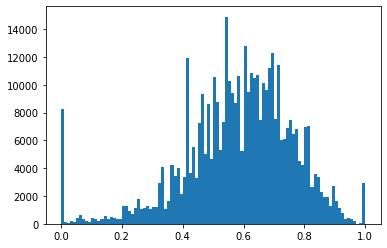

In [46]:
plt.hist(data_tmp['target_encoded'], bins=100)

Zgodnie z oczekiwaniami rozkład jest bardzo zbliżony do kodowania przez Target Encoder. Bardziej widoczne są punkty skrajne, gdyż prawdopodobnie są to elementy z małą liczbą obserwacji, więc użycie Leave One Out Encodera jeszcze bardziej je "uskrajniło".

## M-estimate Encoder
Użyjemy tych samych kolumn co powyżej

In [47]:
te = category_encoders.m_estimate.MEstimateEncoder(data)

data_tmp = data.copy()
encoded=te.fit_transform(data['categories'],data['it_is_allegro_standard'])
data_tmp['target_encoded'] = encoded

In [48]:
data_tmp[['categories', 'it_is_allegro_standard', 'target_encoded']]

,categories,it_is_allegro_standard,target_encoded
0,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,0.881955
1,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.607681
2,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,0.840814
3,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",0,0.530368
4,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,0.701284
5,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.792671
6,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0.792671
7,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,0.643058
8,"['RTV i AGD', 'AGD drobne', 'Higiena i pielęgn...",0,0.828917
9,"['RTV i AGD', 'Kamery', 'Zasilanie', 'Zasilacze']",1,0.527819


(array([ 3981.,   380.,   430.,   243.,   416.,   536.,   722.,   232.,
          675.,   428.,   149.,   845.,   191.,   167.,   868.,   487.,
          249.,   563.,   264.,  1103.,   726.,  1162.,  1145.,   923.,
          520.,  1613.,  1533.,  1174.,   693.,  2203.,  1346.,  1197.,
         1781.,  3384.,  2474.,  1649.,  4002.,  2948.,  3814.,  3027.,
         2730.,  8726.,  7122.,  3814.,  4627.,  4469.,  8896.,  8655.,
         3572., 11270.,  5923.,  7570.,  9335.,  4500., 13169., 11846.,
        11078.,  7288.,  9236.,  7864.,  6822., 13225., 11262.,  8204.,
        11876.,  8715.,  9163.,  8632., 10596., 12567., 10217.,  8796.,
        10515.,  5740.,  7026.,  6840.,  5977.,  6303.,  7166.,  4509.,
         5794.,  5806.,  6821.,  3212.,  2970.,  3631.,  1758.,  2347.,
         1813.,  1108.,  2707.,  1792.,  1633.,   352.,   517.,   528.,
          476.,   347.,   173.,   151.]),
 array([7.28408926e-04, 1.05986118e-02, 2.04688146e-02, 3.03390174e-02,
        4.02092203e-02

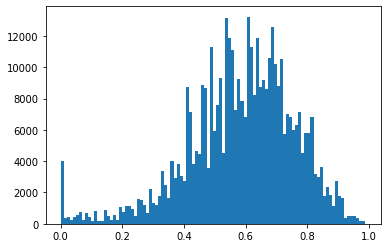

In [50]:
plt.hist(data_tmp['target_encoded'], bins=100)

Tutaj rozkład wydaje się być znacznie bardziej wygładzony. Przede wszystkim znikł pik na 1.

_Mała uwaga: Użyłam wszędzie domyślnych parametrów, gdyż uznałam, że samo dobre i przemyślane dopasowanie parametrów, to powinno być osobne zadanie domowe :)_

## Opis powyższych metod kodowania

- Target Encoding - zmienna jest kodowana poprzez wyliczenie średniej z targetu dla danej kategorii (jest możliwość dodania _smooth_, żeby uniknąć tak skrajnych wartości jak w naszym przypadku)
- Leave One Out Encoding - podobnie jak powyżej, ale bez uwzględniania w średniej bieżącego elementu
- M-estimate Encoding - to podobno uproszczona wersja Target Encodera, zawiera tylko jeden parametr, który definiuje siłę regulaaryzacji

# Uzupełnianie braków danych
W danych nie ma żadnych braków (wg lens), więc usuniemy trochę i porównamy gęstość przed i po. Pod uwagę weźmy zmienną _price_.

In [124]:
data_tmp = data.copy()
data_tmp['price'] = data_tmp.apply(lambda row: row.price if np.random.uniform() < 0.6 else None, axis = 1)
data_tmp.head(20)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,NaN,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,NaN,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
5,5,2016-04-03 16:31:01,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
6,6,2016-04-03 17:56:11,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
7,7,2016-04-03 11:58:55,4824025074,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,1,handel_barbo,NaN,1,886,0,4287,Legionowo,Biżuteria i Zegarki
8,8,2016-04-03 18:18:37,4826332874,"['RTV i AGD', 'AGD drobne', 'Higiena i pielęgn...",1,1,jupiter2009,12.00,0,49,0,5403,zachodniopomorskie,RTV i AGD
9,9,2016-04-03 22:56:56,4828603874,"['RTV i AGD', 'Kamery', 'Zasilanie', 'Zasilacze']",1,1,e-trade-com-pl,NaN,1,4,0,15561,Warszawa,RTV i AGD


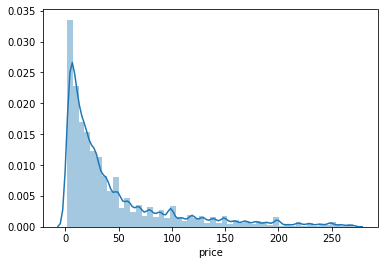

In [125]:
import seaborn as sns
# obetnijmy outliery do celów wizualizacji, bo inaczej nic nie widać :(
def cut_outliers(dt):
    upper_lim = dt.quantile(.95)
    lower_lim = dt.quantile(.05)
    return dt[(dt < upper_lim) & (dt > lower_lim)]

tmp = cut_outliers(data['price'])
sns.distplot(tmp)

Jednak nie użyjemy metody najbliższych sąsiadów ( _Nearest neighbors imputation_ ) dla kilku różnych k. Dane są za duże.
Użyjemy zatem Multivariate feature imputation. Usuńmy nieistotne dane i zakodujmy kategoryczne.

In [126]:
data_tmp = data_tmp.drop(columns=['lp', 'date', 'item_id', 'seller'])
categories = ['categories', 'it_location', 'main_category']

In [127]:
from sklearn.preprocessing import LabelEncoder

# za duzo kategorii by zastosowac ohe, wezmy wiec zwykle label encoding
def label_column(dt, name):
    le = LabelEncoder()
    integer_encoded = le.fit_transform(dt[name])
    dt[name] = integer_encoded

for category in categories:
    label_column(data_tmp, category)

data_tmp.head()


,categories,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,3659,1,1,NaN,1,997,0,50177,7410,12
1,6063,1,1,4.9,1,9288,0,12428,7410,18
2,1731,1,1,NaN,1,895,0,7389,3558,6
3,4704,1,1,18.5,0,971,0,15006,7788,14
4,6305,1,1,19.9,1,950,0,32975,261,18


In [128]:
train = data_tmp[data_tmp.price.notnull()]
test = data_tmp[pd.isnull(data_tmp['price'])]
print(len(train), len(test))

252507 167513


In [130]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(train)

out = imp.transform(test)
df = pd.DataFrame(data=out, columns=['categories', 'pay_option_on_delivery', 'pay_option_transfer', 'price', 'it_is_allegro_standard',
                                    'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location', 'main_category'])

In [131]:
df.head()

,categories,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,3659.0,1.0,1.0,46.939974,1.0,997.0,0.0,50177.0,7410.0,12.0
1,1731.0,1.0,1.0,69.103996,1.0,895.0,0.0,7389.0,3558.0,6.0
2,383.0,1.0,1.0,52.779825,1.0,886.0,0.0,4287.0,3539.0,3.0
3,6821.0,1.0,1.0,65.554339,1.0,4.0,0.0,15561.0,7410.0,20.0
4,334.0,1.0,1.0,60.867740,0.0,0.0,0.0,5430.0,9841.0,3.0


In [132]:
result = pd.concat([df, train])
result.head()

,categories,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,3659.0,1.0,1.0,46.939974,1.0,997.0,0.0,50177.0,7410.0,12.0
1,1731.0,1.0,1.0,69.103996,1.0,895.0,0.0,7389.0,3558.0,6.0
2,383.0,1.0,1.0,52.779825,1.0,886.0,0.0,4287.0,3539.0,3.0
3,6821.0,1.0,1.0,65.554339,1.0,4.0,0.0,15561.0,7410.0,20.0
4,334.0,1.0,1.0,60.867740,0.0,0.0,0.0,5430.0,9841.0,3.0


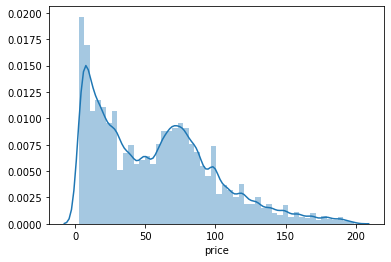

In [133]:
sns.distplot(cut_outliers(result['price']))

Niestety metoda zadziałała słabo (choć nie jest źle). Prawdopodobnie przez dużą liczbę braków. Sprawdźmy, czy ograniczenie braków do 10% coś zmieni

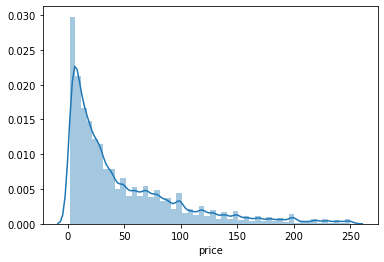

In [134]:
data_tmp = data.copy()
data_tmp['price'] = data_tmp.apply(lambda row: row.price if np.random.uniform() < 0.9 else None, axis = 1)

data_tmp = data_tmp.drop(columns=['lp', 'date', 'item_id', 'seller'])
categories = ['categories', 'it_location', 'main_category']

for category in categories:
    label_column(data_tmp, category)

train = data_tmp[data_tmp.price.notnull()]
test = data_tmp[pd.isnull(data_tmp['price'])]

mp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(train)

out = imp.transform(test)
df = pd.DataFrame(data=out, columns=['categories', 'pay_option_on_delivery', 'pay_option_transfer', 'price', 'it_is_allegro_standard',
                                    'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location', 'main_category'])

result = pd.concat([df, train])
sns.distplot(cut_outliers(result['price']))

Jak widać jest znacznie lepiej. Na pewno warto pamiętać, że im więcej braków mamy, tym trudniej je przybliżać.